In [1]:
import os
from datetime import datetime
import calendar
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [108]:
from matplotlib import font_manager
f_path = "/Library/Fonts/Arial Unicode.ttf"
font_manager.FontProperties(fname=f_path).get_name()
from matplotlib import rc
rc('font', family = "Arial Unicode MS")

In [17]:
print(os.listdir("./skt_raw_data/"))

['CALL_NDELIVERY_08MONTH (2).csv', 'CALL_NDELIVERY_03MONTH (4).csv', 'CALL_NDELIVERY_04MONTH (4).csv', 'CALL_NDELIVERY_11MONTH (4).csv', 'CALL_NDELIVERY_09MONTH (3).csv', 'CALL_NDELIVERY_10MONTH (4).csv', 'CALL_NDELIVERY_09MONTH.csv', 'CALL_NDELIVERY_08MONTH.csv', 'CALL_NDELIVERY_05MONTH (4).csv', 'CALL_NDELIVERY_09MONTH (2).csv', 'CALL_NDELIVERY_02MONTH (4).csv', 'CALL_NDELIVERY_08MONTH (3).csv', 'CALL_NDELIVERY_03MONTH.csv', 'CALL_NDELIVERY_02MONTH.csv', 'CALL_NDELIVERY_02MONTH (3).csv', 'CALL_NDELIVERY_06MONTH (1).csv', 'CALL_NDELIVERY_05MONTH (3).csv', 'CALL_NDELIVERY_01MONTH (1).csv', 'CALL_NDELIVERY_10MONTH (3).csv', 'CALL_NDELIVERY_08MONTH (4).csv', 'CALL_NDELIVERY_03MONTH (2).csv', 'CALL_NDELIVERY_04MONTH (2).csv', 'CALL_NDELIVERY_11MONTH (2).csv', 'CALL_NDELIVERY_04MONTH.csv', 'CALL_NDELIVERY_05MONTH.csv', 'CALL_NDELIVERY_12MONTH (1).csv', 'CALL_NDELIVERY_11MONTH (3).csv', 'CALL_NDELIVERY_04MONTH (3).csv', 'CALL_NDELIVERY_07MONTH (1).csv', 'CALL_NDELIVERY_03MONTH (3).csv', '배달

In [20]:
os.listdir("./skt_raw_data/")[0]

'CALL_NDELIVERY_08MONTH (2).csv'

In [2]:
df_0 = pd.read_csv("./skt_raw_data/"+os.listdir("./skt_raw_data/")[0])

In [3]:
df_1 = pd.read_csv("./skt_raw_data/"+os.listdir("./skt_raw_data/")[1])

In [4]:
df = df_0.append(df_1)

In [5]:
for i in range(2, 73):
    try:
        df_0 = pd.read_csv("./skt_raw_data/"+os.listdir("./skt_raw_data/")[i])
        df = df.append(df_0)
    except:
        pass

df.tail()


,일자,요일,시간대,업종,시도,시군구,읍면동,통화건수,이용건수,통화량
2624,20140430,수,22,피자,NaN,NaN,NaN,NaN,418.0,NaN
2625,20140430,수,23,음식점-족발/보쌈전문,NaN,NaN,NaN,NaN,118.0,NaN
2626,20140430,수,23,음식점-중국음식,NaN,NaN,NaN,NaN,175.0,NaN
2627,20140430,수,23,치킨,NaN,NaN,NaN,NaN,1707.0,NaN
2628,20140430,수,23,피자,NaN,NaN,NaN,NaN,109.0,NaN


In [10]:
df = df.sort_values(["일자", "시간대"])

In [32]:
df.reset_index(drop = True, inplace=True)

In [34]:
display(df[df.duplicated()])

,date,weekday,hour,menu,sido,sigungu,dong,call1,call2,call3,count


In [15]:
df.columns=["date", "weekday", "hour", "menu", "sido", "sigungu", "dong", "call1", "call2", "call3"]

In [21]:
df["call1"].notnull().sum() + df["call2"].notnull().sum() +df["call3"].notnull().sum()

5445993

In [23]:
df["call1"].fillna(0, inplace=True)
df["call2"].fillna(0, inplace=True)
df["call3"].fillna(0, inplace=True)

In [24]:
df["count"] = df["call1"] +df["call2"]+df["call3"]

In [33]:
df.tail()

,date,weekday,hour,menu,sido,sigungu,dong,call1,call2,call3,count
5445988,20190930,월,23,피자,서울특별시,서초구,양재동,5.0,0.0,0.0,5.0
5445989,20190930,월,23,피자,서울특별시,성북구,동선동2가,5.0,0.0,0.0,5.0
5445990,20190930,월,23,피자,서울특별시,송파구,가락동,5.0,0.0,0.0,5.0
5445991,20190930,월,23,피자,서울특별시,영등포구,영등포동5가,5.0,0.0,0.0,5.0
5445992,20190930,월,23,피자,서울특별시,중랑구,면목동,5.0,0.0,0.0,5.0


In [35]:
df.drop(columns=["call1","call2","call3"], inplace=True)

In [36]:
df.tail()

,date,weekday,hour,menu,sido,sigungu,dong,count
5445988,20190930,월,23,피자,서울특별시,서초구,양재동,5.0
5445989,20190930,월,23,피자,서울특별시,성북구,동선동2가,5.0
5445990,20190930,월,23,피자,서울특별시,송파구,가락동,5.0
5445991,20190930,월,23,피자,서울특별시,영등포구,영등포동5가,5.0
5445992,20190930,월,23,피자,서울특별시,중랑구,면목동,5.0


In [47]:
not_seoul = df[df["sido"]!="서울특별시"][df["sido"].notnull()].index
not_seoul

Int64Index([471359, 557498, 1430314, 1470436], dtype='int64')

In [48]:
df_1 = df.drop(not_seoul).reset_index(drop = True)

In [46]:
df_1[df_1["sido"]!="서울특별시"][df_1["sido"].notnull()]

,date,weekday,hour,menu,sido,sigungu,dong,count


In [61]:
df_1["count"].sum()

96873359.0

In [57]:
df_del_detail = df.drop(columns = ["sigungu", "dong"])

In [63]:
df_grouping= df_del_detail.groupby(by=["date", "weekday", "hour","menu"], as_index=False).sum()

In [65]:
df_grouping.tail()

,date,weekday,hour,menu,count
203563,20190930,월,22,피자,205.0
203564,20190930,월,23,음식점-족발/보쌈전문,65.0
203565,20190930,월,23,음식점-중국음식,90.0
203566,20190930,월,23,치킨,392.0
203567,20190930,월,23,피자,75.0


In [66]:
df = df_grouping

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 203568 entries, 0 to 203567
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   date     203568 non-null  int64  
 1   weekday  203568 non-null  object 
 2   hour     203568 non-null  int64  
 3   menu     203568 non-null  object 
 4   count    203568 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 9.3+ MB


In [72]:
df['year'] = df.date.apply(lambda x : str(x)[:4])
df['month'] = df.date.apply(lambda x : str(x)[4:6])
df['year_month'] = df.date.apply(lambda x : str(x)[:6])
df['day'] = df.date.apply(lambda x: str(x)[6:])

In [75]:
df["holiday"] = df.weekday.apply(lambda x : 1 if x == "토" or x=="일" else 0)

In [79]:
df['year'] = pd.to_numeric(df.year, errors='coerce')
df['month'] = pd.to_numeric(df.month, errors='coerce')
df['year_month']= pd.to_numeric(df.year_month, errors='coerce')
df['day'] = pd.to_numeric(df.day, errors='coerce')

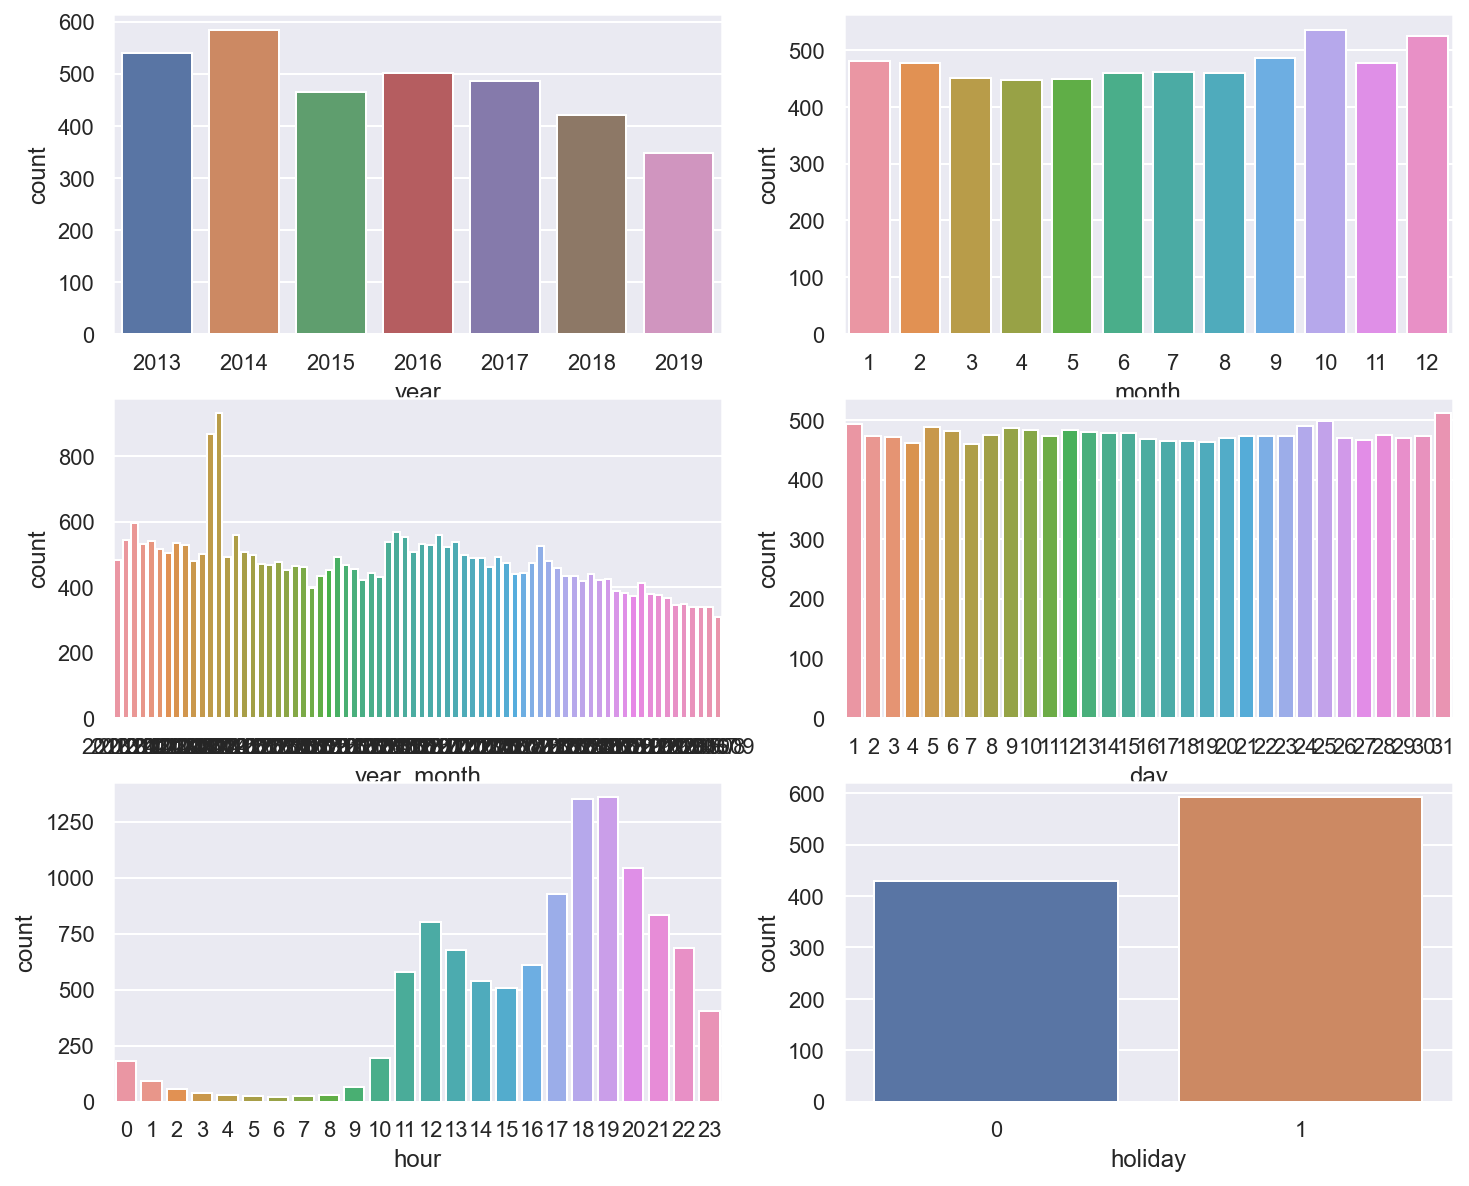

In [82]:
fig = plt.figure(figsize=[12, 10])
ax1 = fig.add_subplot(3, 2, 1)
ax1 = sns.barplot(x='year', y='count',
                  data=df.groupby('year')['count'].mean().reset_index())

ax2 = fig.add_subplot(3, 2, 2)
ax2 = sns.barplot(x='month', y='count',
                  data=df.groupby('month')['count'].mean().reset_index())

ax3 = fig.add_subplot(3, 2, 3)
ax3 = sns.barplot(x='year_month', y='count',
                  data=df.groupby('year_month')['count'].mean().reset_index())


ax4 = fig.add_subplot(3, 2, 4)
ax4 = sns.barplot(x='day', y='count',
                  data=df.groupby('day')['count'].mean().reset_index())

ax5 = fig.add_subplot(3, 2, 5)
ax5 = sns.barplot(x='hour', y='count',
                  data=df.groupby('hour')['count'].mean().reset_index())

ax6 = fig.add_subplot(3, 2, 6)
ax6 = sns.barplot(x='holiday', y='count',
                  data=df.groupby('holiday')['count'].mean().reset_index())

In [83]:
# 1. 2014년부터 배달량 감소 추이 ..?
# 2. 여름보다 겨울에 배달량이 많을까?
# 3. 2014년 9월 10월에는 무슨일이 ?
# 4. 일별로는 매우 고르게 분포 - 일별 분석은 큰 의미가 없어보임
# 5. 점심시간대와 저녁시간대에 배달량 급증 -> 다른변수(holiday, menu)에 상관없이 항상 그럴까?
# 6. 주말 배달량 > 평일 배달량 -> 모든 주말은 모든 평일보다 배달량이 많을까?

### 1. 2014년 부터 배달량이 감소한걸까?

- 배달의 민족 류승룡 모델 발탁, TV 광고 시작
- 배달 어플의 시대 시작
- 배달의 민족 통계 이미지 참고

### 2. 여름보다 겨울에 배달량이 많을까?/

In [84]:
def season(month): 
    if month in [12, 1, 2]:
        return "winter"
    elif month in [3, 4, 5]:
        return "spring"
    elif month in [6, 7, 8]:
        return "summer"
    elif month in [9, 10, 11]:
        return "fall"

df["season"] = df.month.apply(season)

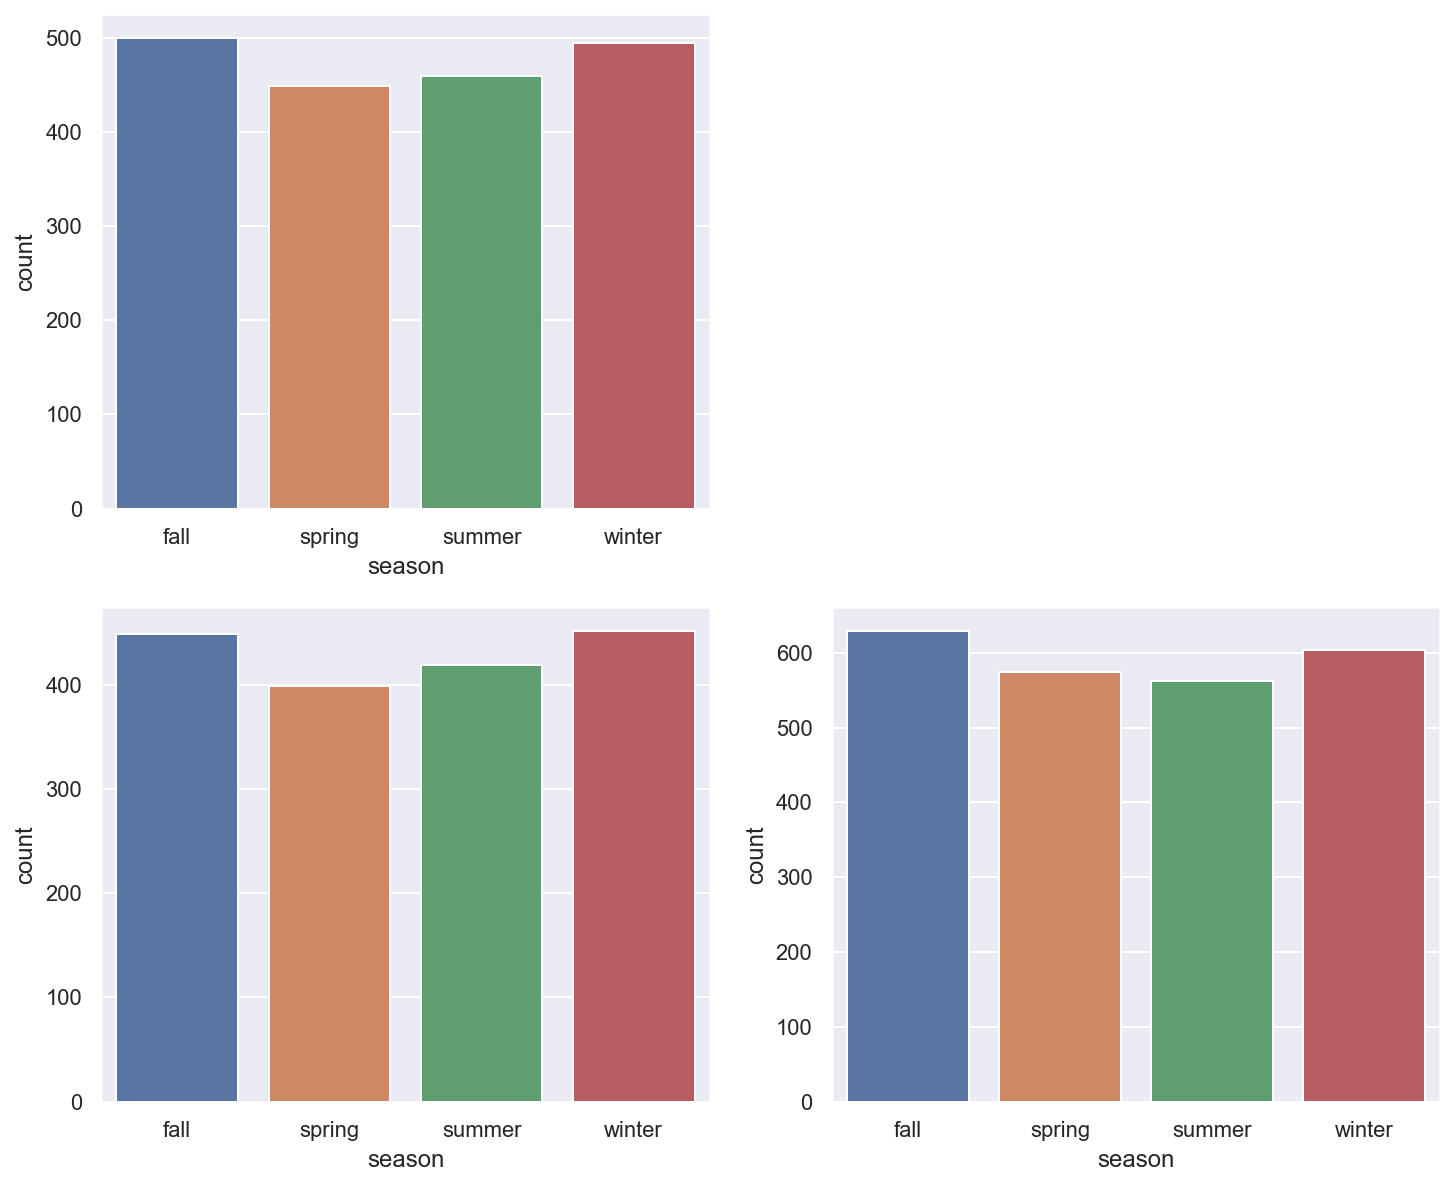

In [86]:
# 계절별 / 휴일별 
fig = plt.figure(figsize=(12, 10))

ax1 = fig.add_subplot(2, 2, 1)
ax1 = sns.barplot(x='season', y='count',
                  data=df.groupby("season")['count'].mean().reset_index())

ax2 = fig.add_subplot(2, 2, 3)
ax2 = sns.barplot(x='season', y='count',
                  data=df[df["holiday"]==0].groupby("season")['count'].mean().reset_index())

ax2 = fig.add_subplot(2, 2, 4)
ax2 = sns.barplot(x='season', y='count',
                  data=df[df["holiday"]==1].groupby("season")['count'].mean().reset_index())

In [ ]:
# 휴일 여부에 따라 계절 (봄, 여름)배달 분포 조금 다를 듯 . .  정규화에 도전해보자

### 3. 2014년 9월 10월에는 무슨일이 ?

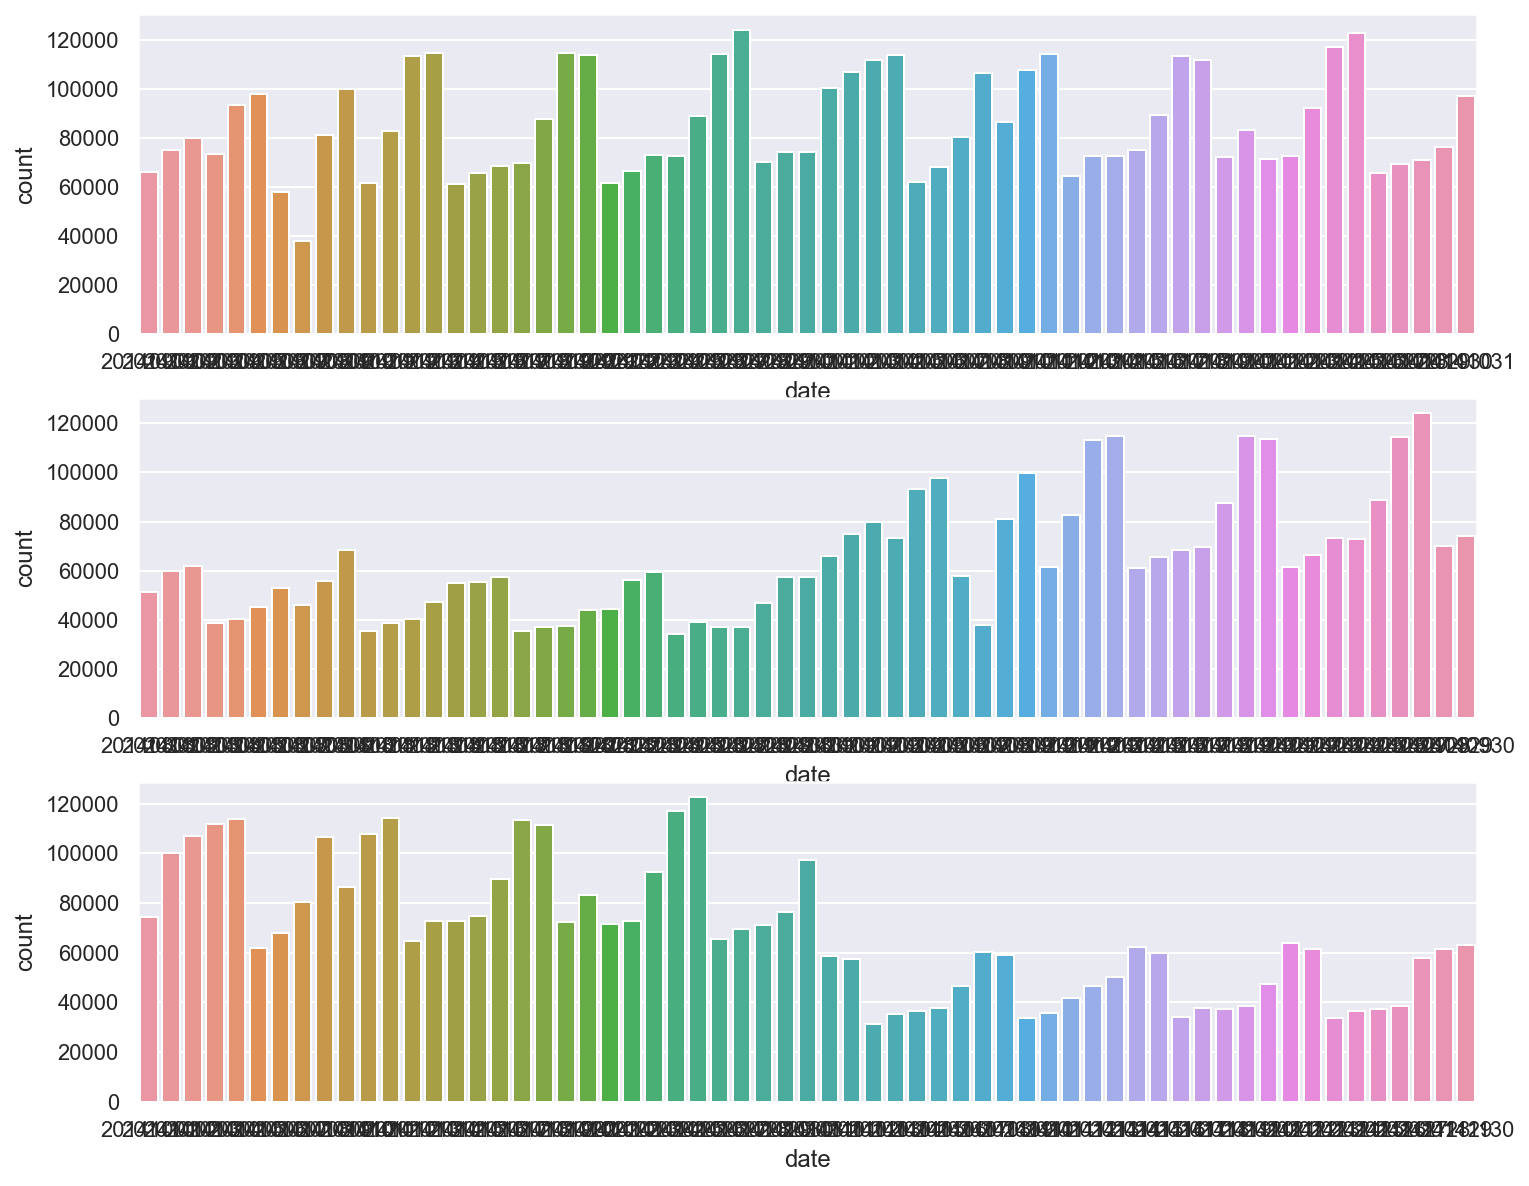

In [102]:
fig = plt.figure(figsize=[12, 10])
ax1 = fig.add_subplot(3, 1, 1)
ax1 = sns.barplot(x='date', y='count',
                  data=df[df["year_month"].isin([201409, 201410])].groupby("date")['count'].sum().reset_index())

ax2 = fig.add_subplot(3, 1, 2)
ax2 = sns.barplot(x='date', y='count',
                  data=df[df["year_month"].isin([201408, 201409])].groupby("date")['count'].sum().reset_index())

ax3 = fig.add_subplot(3, 1, 3)
ax3 = sns.barplot(x='date', y='count',
                  data=df[df["year_month"].isin([201410, 201411])].groupby("date")['count'].sum().reset_index())


##### 9월 28일 인천 아시안게임 축구 8강 
    - 오후 2시 북한 vs 아랍에미리트
    - 오후 5시 한국 vs 일본
##### 10월 2일 인천 아시안게임 축구 결승
    - 한국 vs 북한

#### 말고는 특벽한 일을 못찾겠다 ㅠㅠㅠ 왜지
#### 월이 변할때의 구분선이 너무 정확하다. 데이터 자체에 문제가 있진 않을지?

### 5. 점심시간대와 저녁시간대에 배달량 급증 -> 다른변수(holiday, menu)에 상관없이 항상 그럴까?

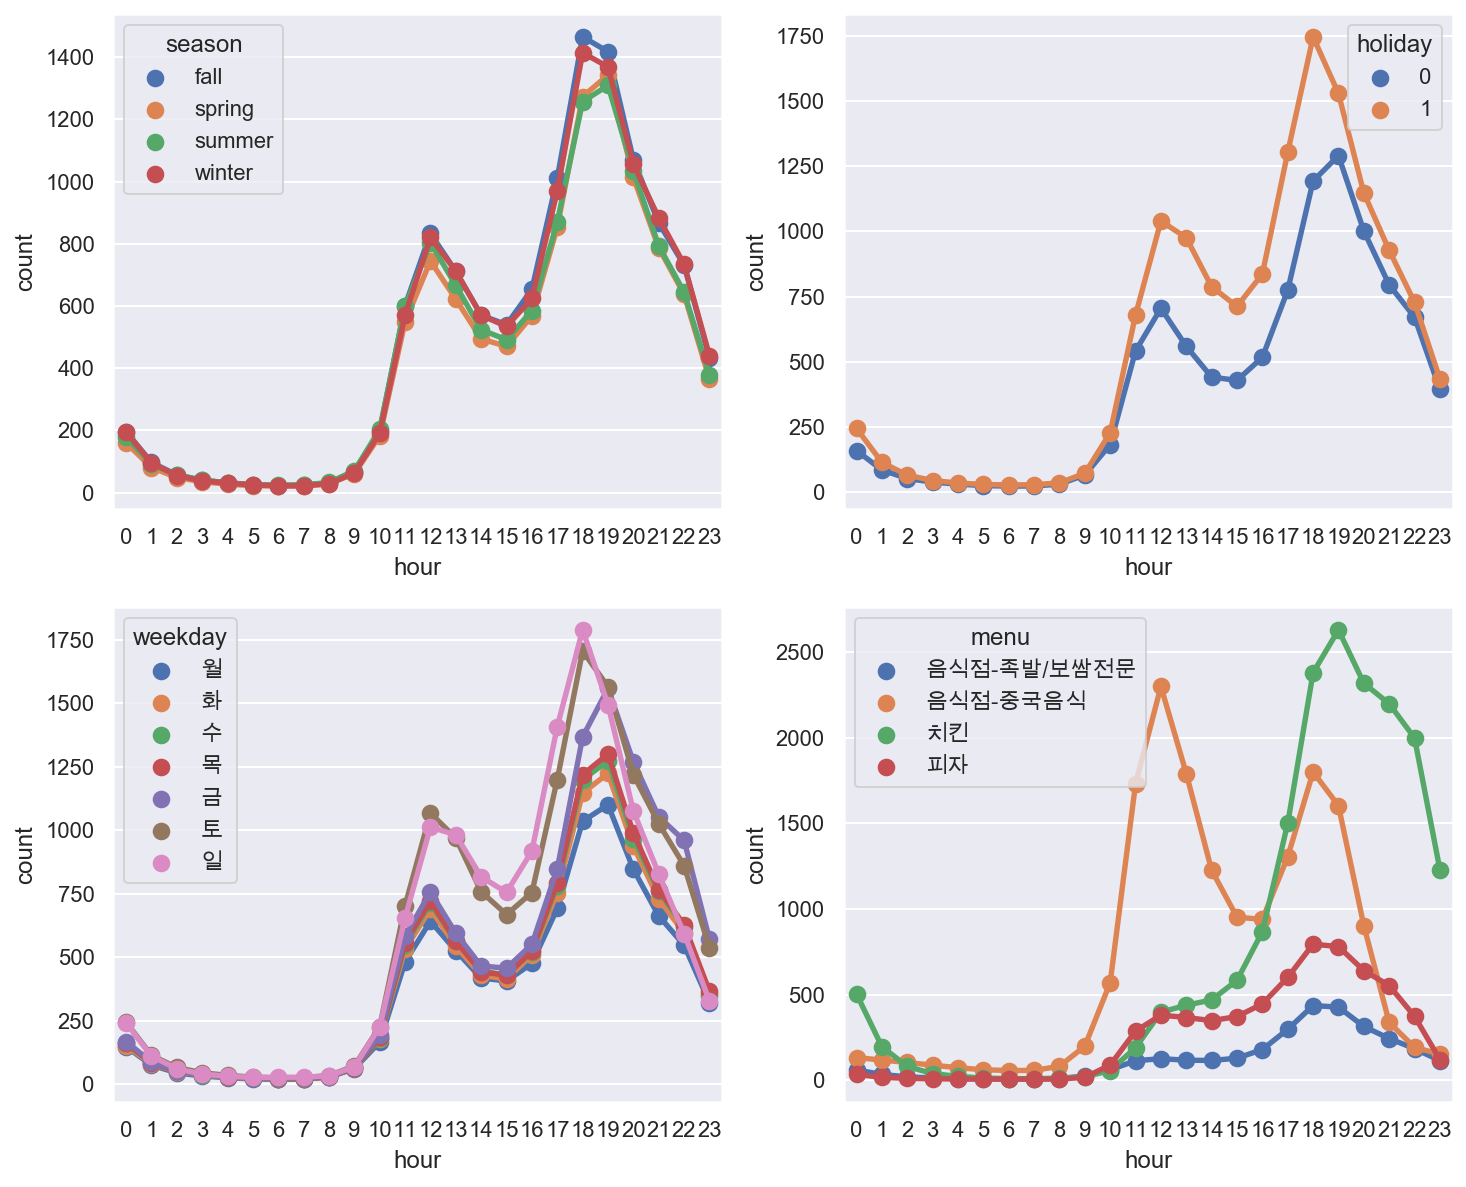

In [109]:
# 1. 시간과 계절에 따른 count
fig = plt.figure(figsize=(12, 10))
ax1 = fig.add_subplot(2, 2, 1)
ax1 = sns.pointplot(x='hour', y='count', hue="season",
                    data=df.groupby(['season', 'hour'])['count'].mean().reset_index())

# 2. 시간과 휴일에 따른 count
ax2 = fig.add_subplot(2, 2, 2)
ax2 = sns.pointplot(x='hour', y='count', hue="holiday",
                    data=df.groupby(['holiday', 'hour'])['count'].mean().reset_index())

# 3. 시간과 요일에 따른 count
ax3 = fig.add_subplot(2, 2, 3)
ax3 = sns.pointplot(x='hour', y='count', hue="weekday", hue_order=['월', '화',
                                                                   '수', '목',
                                                                   '금', '토',
                                                                   "일"],
                    data=df.groupby(['weekday', 'hour'])['count'].mean().reset_index())
# 4. 시간과 메뉴에 따른 count
ax4 = fig.add_subplot(2, 2, 4)
ax4 = sns.pointplot(x='hour', y='count', hue="menu",
                    data=df.groupby(['menu', 'hour'])['count'].mean().reset_index())

### 6. 주말 배달량 > 평일 배달량 -> 모든 주말은 모든 평일보다 배달량이 많을까?

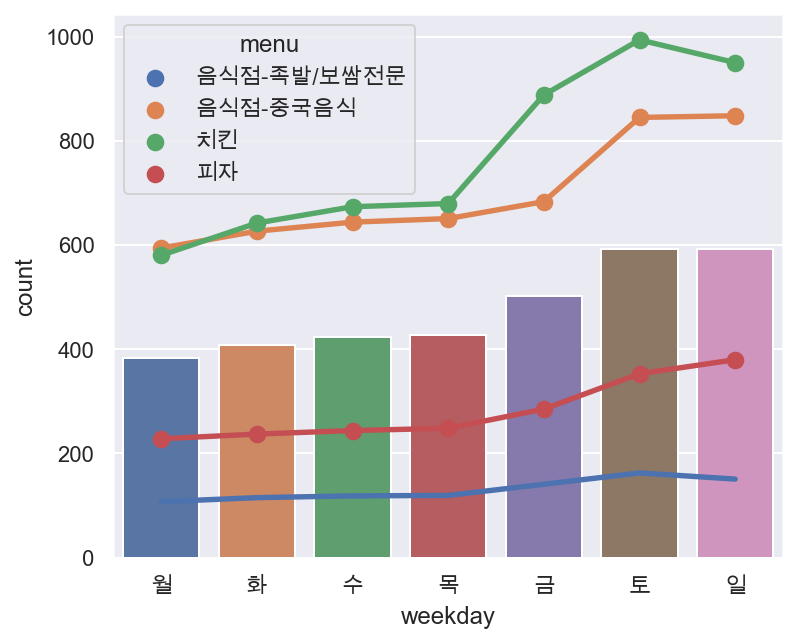

In [115]:
fig = plt.figure(figsize=(6, 5))

ax1 = sns.barplot(x='weekday', y='count', order = ["월","화", "수", "목", "금", "토", "일"],
                    data=df.groupby(['weekday'])['count'].mean().reset_index())
ax1 = sns.pointplot(x='weekday', y='count', hue='menu', order = ["월","화", "수", "목", "금", "토", "일"],
                    data=df.groupby(['weekday','menu'])['count'].mean().reset_index())

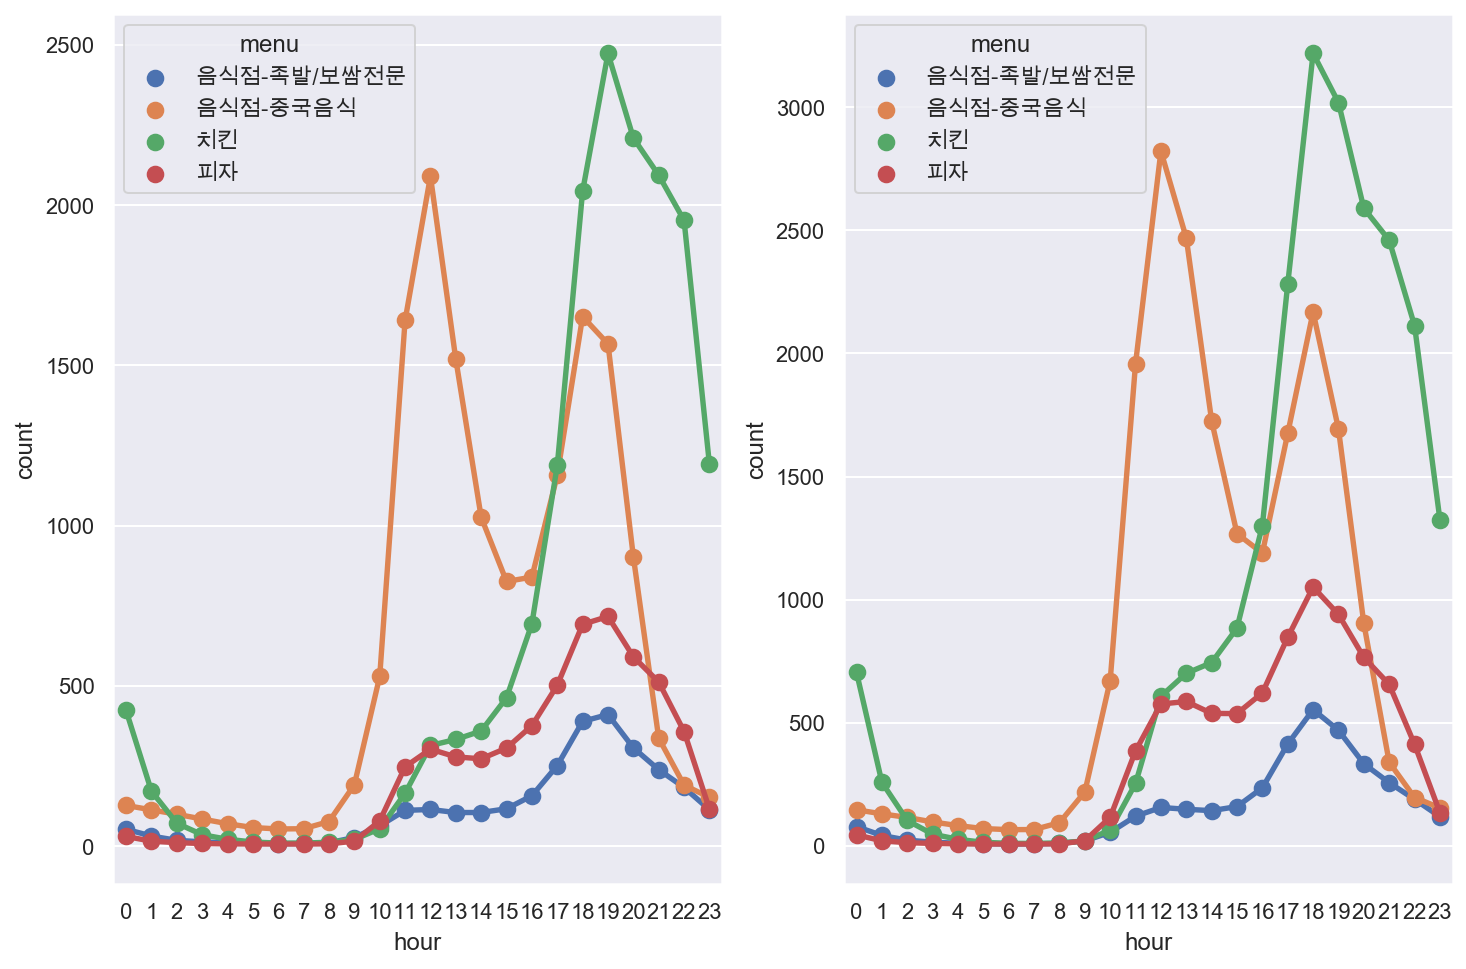

In [119]:
fig = plt.figure(figsize=(12, 8))

ax1 = fig.add_subplot(1, 2, 1)
ax1 = sns.pointplot(x='hour', y='count', hue="menu",
                    data=df[df["holiday"]==0].groupby(['menu', 'hour'])['count'].mean().reset_index())

ax2 = fig.add_subplot(1, 2, 2)
ax2 = sns.pointplot(x='hour', y='count', hue="menu",
                    data=df[df["holiday"]==1].groupby(['menu', 'hour'])['count'].mean().reset_index())

In [120]:
# 평일과 주말의 분포가 비슷한 형태인 것에 비해 주말 피자의 주문건수는 더 많이 증가하는 편

In [121]:
# 공공데이터 api를 이용하여 평일 공휴일 데이터를 가져와보자

In [127]:
from bs4 import BeautifulSoup
import urllib.parse as urlparse

In [147]:
url = "http://apis.data.go.kr/B090041/openapi/service/SpcdeInfoService"
operation = "getRestDeInfo"
params = {'solYear' : '2013', 'solMonth' : '12'}
mykey = 'ac%2FSOW4KzOFKdu0z01iEVWGZd4TBl1MyiR04%2FfYmADthCjJBEyL73pewbapUk94Gm1%2FqtzMCban3C%2BpqU8c7ew%3D%3D'

In [148]:
params = urlparse.urlencode(params)
params

'solYear=2013&solMonth=12'

In [149]:
rq_query = url +'/' + operation + '?' + params + "&serviceKey=" + mykey
rq_query

'http://apis.data.go.kr/B090041/openapi/service/SpcdeInfoService/getRestDeInfo?solYear=2013&solMonth=12&serviceKey=ac%2FSOW4KzOFKdu0z01iEVWGZd4TBl1MyiR04%2FfYmADthCjJBEyL73pewbapUk94Gm1%2FqtzMCban3C%2BpqU8c7ew%3D%3D'

In [150]:
response = requests.get(rq_query)
response

<Response [200]>

In [151]:
dom = BeautifulSoup(response.content, "html.parser")

In [172]:
datename = dom.find_all("item")
datename[0].datename

<datename>기독탄신일</datename>